<a href="https://colab.research.google.com/github/ram30098singh/Machine_Learning-Model/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Titanic

The sinking of the RMS Titanic marked a tragic event in maritime history, resulting in a significant loss of life during its maiden voyage from Southampton, England to New York City, United States, on 15 April 1912. The ship, operated by the White Star Line, struck an iceberg in the North Atlantic Ocean. With approximately 2,224 passengers and crew members on board, the disaster claimed the lives of over 1,500 individuals. This catastrophic incident remains one of the most devastating peacetime sinkings of an ocean liner or cruise ship.

# Table of Contents

1. Objective
2. Import the libraries
3. Dataset Description
4. Exploratory data analysis(EDA)
5. Data preprocessing
6. Construct Model with XGBClassifier (XGBoost)
7. Then finding Precision, Recall, Accuracy value for the model
8. Prediction ( Model with highest Accuracy)


# Objective
To build a predictive model that answers the question:


*  What percentage of people were more likely to survive?

In [ ]:
import pandas as pd
# 1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# 1.0.2
from pathlib import Path

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# For skopt routines
! pip install scikit-optimize

# 0.1 For plotting skopt results
! pip install 'scikit-optimize[plots]'
# 1.0 Clear ipython memory
#%reset -f

# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from xgboost.sklearn import XGBClassifier
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform


In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/Subhamtr01/Titanic/main/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/Subhamtr01/Titanic/main/test.csv")
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols_for_oh = ['Embarked', 'Sex']
oh = OneHotEncoder()
oh_encoded_train = oh.fit_transform(train[cols_for_oh])
oh_encoded_test = oh.transform(test[cols_for_oh])
oh_cols_generated = oh.get_feature_names_out()

oh_encoded_train_df = train.copy()
oh_encoded_test_df = test.copy()
oh_encoded_train_df[oh_cols_generated] = pd.DataFrame(oh_encoded_train.toarray(), columns=oh_cols_generated)
oh_encoded_test_df[oh_cols_generated] = pd.DataFrame(oh_encoded_test.toarray(), columns=oh_cols_generated)
oh_encoded_train_df.drop(cols_for_oh, axis=1, inplace=True)
oh_encoded_test_df.drop(cols_for_oh, axis=1, inplace=True)
oh_encoded_train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
oh_encoded_train_df['Age_null'] = 0
oh_encoded_test_df['Age_null'] = 0
oh_encoded_train_df.loc[oh_encoded_train_df.Age.isna(), 'Age_null'] = 1
oh_encoded_test_df.loc[oh_encoded_test_df.Age.isna(), 'Age_null'] = 1
oh_encoded_train_df.loc[oh_encoded_train_df.Age.isna(), 'Age'] = oh_encoded_train_df.Age.median()
oh_encoded_test_df.loc[oh_encoded_test_df.Age.isna(), 'Age'] = oh_encoded_test_df.Age.median()

In [ ]:
oh_encoded_train_df['cabin_count'] = oh_encoded_train_df['Cabin'].apply(lambda x: len(oh_encoded_train_df.loc[oh_encoded_train_df.Cabin==x]))
oh_encoded_test_df['cabin_count'] = oh_encoded_test_df['Cabin'].apply(lambda x: len(oh_encoded_test_df.loc[oh_encoded_test_df.Cabin==x]))
oh_encoded_train_df.drop('Cabin', axis=1, inplace=True)
oh_encoded_test_df.drop('Cabin', axis=1, inplace=True)
oh_encoded_train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male,Age_null,cabin_count
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0,0


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'Survived vs Dead')

[Text(0, 0, '549.00'), Text(0, 0, '342.00')]

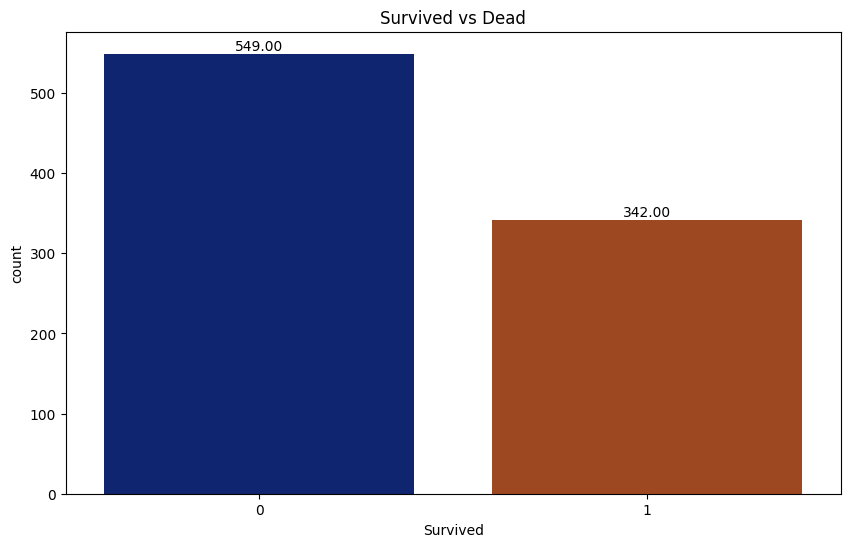

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_palette("dark")  # Set a dark color palette
sns.countplot(x='Survived', data=train)
plt.title('Survived vs Dead')

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'Survived vs Dead with Gender')

[Text(0, 0, '468.00'), Text(0, 0, '109.00')]

[Text(0, 0, '81.00'), Text(0, 0, '233.00')]

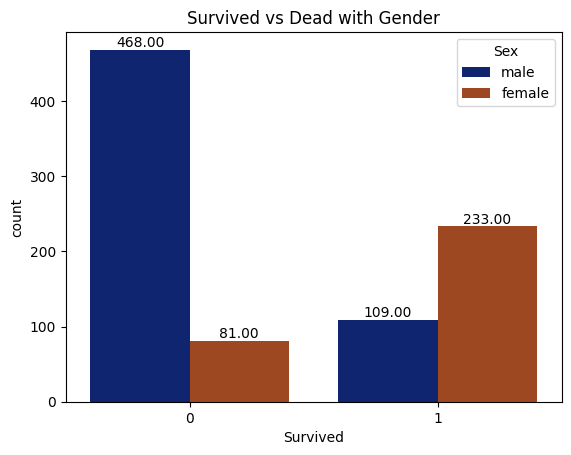

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survived vs Dead with Gender')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

Text(0.5, 1.0, 'Male Vs Female with Class')

[Text(0, 0, '122.00'), Text(0, 0, '108.00'), Text(0, 0, '347.00')]

[Text(0, 0, '94.00'), Text(0, 0, '76.00'), Text(0, 0, '144.00')]

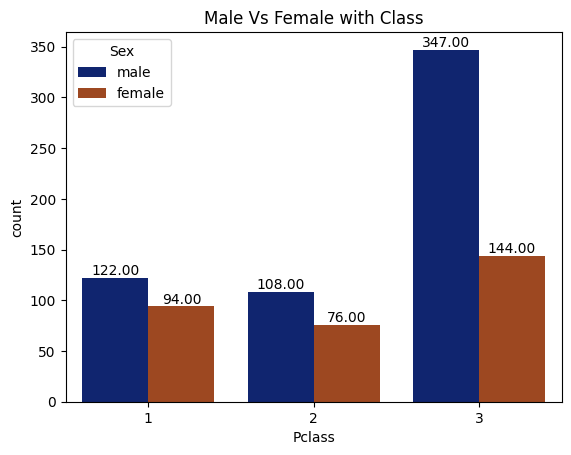

In [ ]:
sns.countplot(x='Pclass', hue='Sex', data=train)
plt.title('Male Vs Female with Class')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

Text(0.5, 1.0, 'Survived vs Dead with Class')

[Text(0, 0, '80.00'), Text(0, 0, '97.00'), Text(0, 0, '372.00')]

[Text(0, 0, '136.00'), Text(0, 0, '87.00'), Text(0, 0, '119.00')]

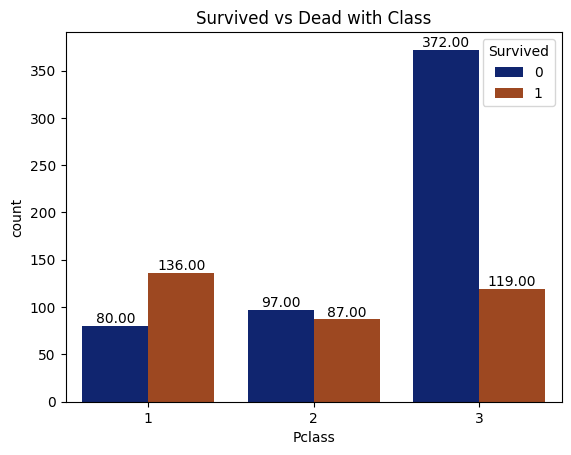

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survived vs Dead with Class')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Fare'>

Text(0.5, 1.0, 'Scatter Plot: Age vs Fare')

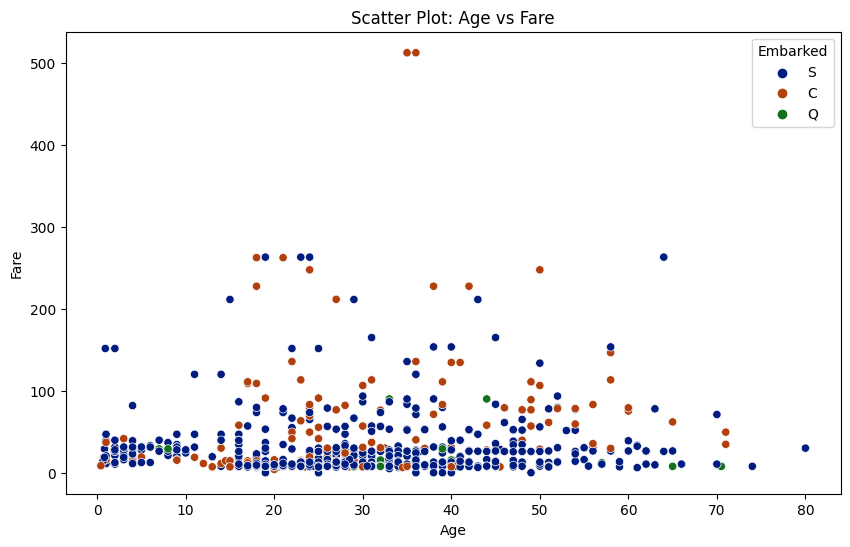

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Embarked')
plt.title('Scatter Plot: Age vs Fare')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Sex', ylabel='Age'>

Text(0.5, 1.0, 'Violin Plot: Gender vs Age')

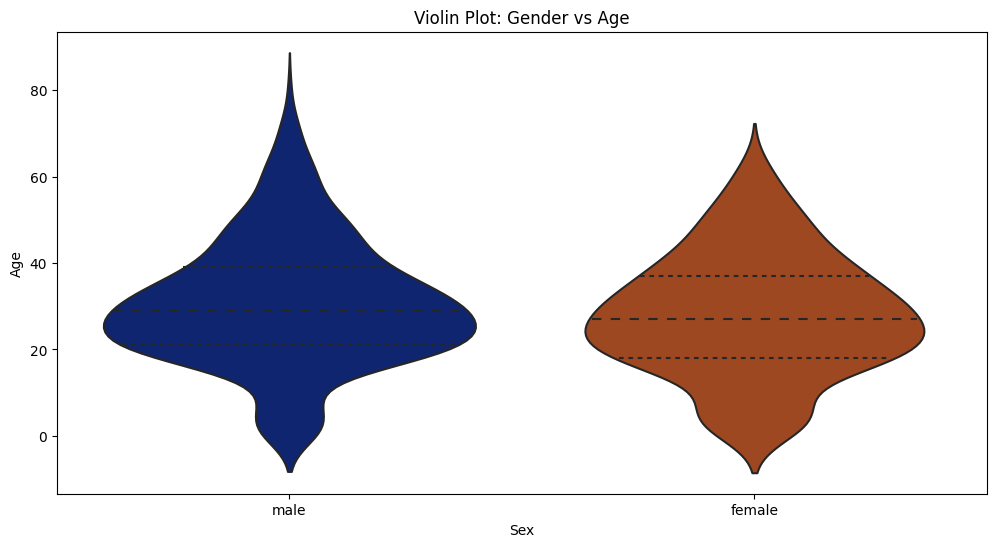

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Sex', ylabel='Fare'>

Text(0.5, 1.0, 'Violin Plot: Sex vs Fare')

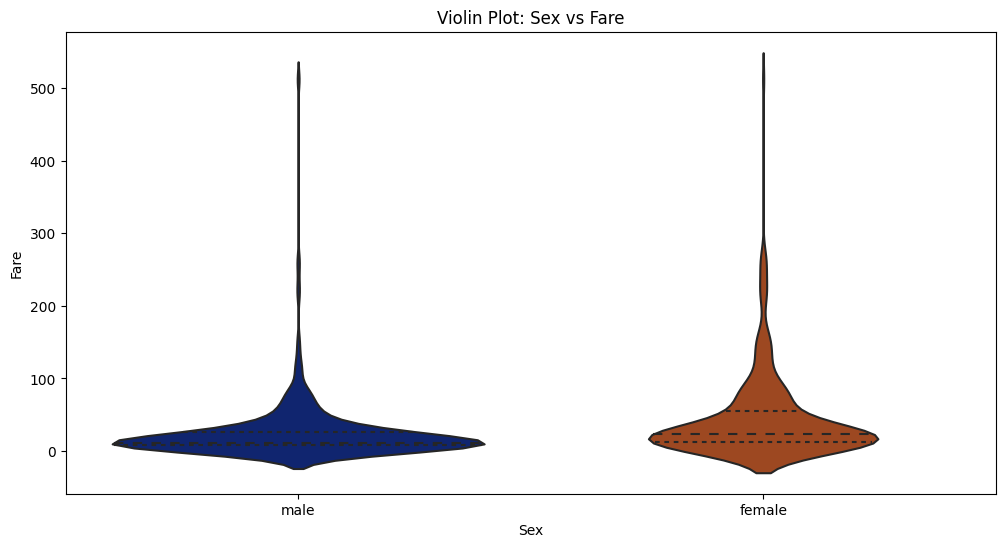

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=train, x='Sex', y='Age', inner='quartile')
plt.title('Violin Plot: Gender vs Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=train, x='Sex', y='Fare', inner='quartile')
plt.title('Violin Plot: Sex vs Fare')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_cols = oh_encoded_test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1).columns

X_train, X_test, y_train = oh_encoded_train_df[feature_cols], oh_encoded_test_df[feature_cols], oh_encoded_train_df['Survived']
y_test = pd.read_csv("https://raw.githubusercontent.com/Subhamtr01/Titanic/main/gender_submission.csv")

In [ ]:
X_test.shape, X_train.shape, y_train.shape, y_test.shape

((418, 13), (891, 13), (891,), (418, 2))

In [ ]:
median_value=X_test['Fare'].median()
X_test["Fare"].fillna(median_value, inplace=True)

<ipython-input-107-1adb2382a2f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Fare"].fillna(median_value, inplace=True)


In [ ]:
X_train.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
Sex_female      0
Sex_male        0
Age_null        0
cabin_count     0
dtype: int64

In [ ]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)
            )
            ]

In [ ]:
pipe_xg = Pipeline(steps_xg)

In [ ]:
# 6.3 Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05],   #learning rate decides what percentage of error is to be fitted by next boosted tree

              'xg__n_estimators':   [200,  300],   #number of boosted trees to fit

              'xg__max_depth':      [4,6],
              'pca__n_components' : [8,13],
              'xg__booster': ['gbtree','gblinear']
              }


In [ ]:
clf = GridSearchCV(pipe_xg,
                   parameters,
                   n_jobs = 2,
                   cv =2 ,
                   verbose =1,
                   scoring = ['accuracy', 'roc_auc'],
                   refit = 'roc_auc')

In [ ]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60



--Takes time...---

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[15:15:27] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importan...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=3,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=2,
             param_grid={'pca__n_components': [8, 13],
                         'xg__booster': ['gbtree', 'gblinear'],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6],
                         'xg__n_estimators': [200, 300]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

0.4825975775718689

In [ ]:
# 7.3
f"Best score: {clf.best_score_} "            # 'Best score: 840520087544674

# 7.3.1
print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.8411050186847344 '

"Best parameter set {'pca__n_components': 13, 'xg__booster': 'gbtree', 'xg__learning_rate': 0.03, 'xg__max_depth': 4, 'xg__n_estimators': 200}"

In [ ]:
# 7.4. Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

--Few predictions--



array([0, 0, 0, 0])

In [ ]:
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
y_test.drop("PassengerId", axis = 1 ,inplace= True)

In [ ]:
# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0



--Accuracy Score--



88.75598086124403

In [ ]:
# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Confusion Matrix--



array([[242,  24],
       [ 23, 129]])

In [ ]:
# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)



--F1 Score pos-label: 1--



0.8459016393442623



--F1 Score pos-label: 0--



0.911487758945386

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probability scores for the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Print the ROC AUC score
print("ROC AUC:", roc_auc)


ROC AUC: 0.9332954095765729


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

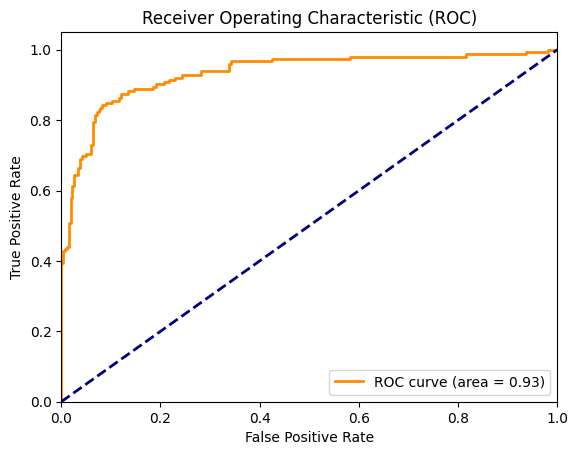

In [ ]:

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(13,)



---Feature importances---



array([0.33679974, 0.08936766, 0.04583699, 0.08810121, 0.03954957,
       0.05029536, 0.06592294, 0.05043318, 0.04240869, 0.05085047,
       0.06773839, 0.03262982, 0.0400661 ], dtype=float32)

In [ ]:
colnames = X_train.columns.tolist()
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp


,imp
Age_null,0.032630
Fare,0.039550
cabin_count,0.040066
Embarked_nan,0.042409
SibSp,0.045837
Embarked_C,0.050295
Embarked_S,0.050433
Sex_female,0.050850
Embarked_Q,0.065923
Sex_male,0.067738


In [ ]:
list(df_imp.index.values[:5])

['Age_null', 'Fare', 'cabin_count', 'Embarked_nan', 'SibSp']

In [ ]:
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(7,13)}

In [ ]:
rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,
                          cv = 2
                        )

In [ ]:

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 4 minutes

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[15:15:31] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            im...
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_iter=4, n_jobs=2,
                   param_distributions={'pca__n_components': range(7, 13),
                                        'xg__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c82589aa0e0>,
                                        'xg__max_depth': range(3, 10),
                                        'xg__n_estimators': range(50, 300)},
                   refit='roc_auc', scoring=['roc_auc', 'accuracy'], verbose=1)

0.06037842432657878

In [ ]:
# 9.3 Evaluate
f"Best score: {rs.best_score_} " ;print()           # 'Best score: 0.8780097831252602 '
f"Best parameter set: {rs.best_params_} " ; print()


# 9.4 Make predictions from the best returned model
y_pred = rs.predict(X_test)


# 9.5 Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}" ; print()


'Best score: 0.8145948924512121 '

"Best parameter set: {'pca__n_components': 10, 'xg__learning_rate': 0.06612792290423053, 'xg__max_depth': 6, 'xg__n_estimators': 154} "

'Accuracy: 80.622009569378'

'f1 score: 0.7361563517915309'